# Kalman Filter and Linear Quadratic Gaussian

##Mrinalini Patil
##CB.EN.P2AEL17013
##Control bootcamp video 21,22

<iframe width="853" height="480" src="https://www.youtube.com/embed/Lgq4R-F8SX8?list=PLMrJAkhIeNNR20Mz-VpzgfQs5zrYi085m" frameborder="0" allow="autoplay; encrypted-media" allowfullscreen></iframe>

### Kalman filter:
<ol>
Kalman filter is a tool with recursive predict and update operations.</ol>

<ol>
Assumptions:
Kalman filter always work with Guassian distribution and linear functions</ol>

### Steps involved in Kalman filter:
<ol>
  
  <li>Initialization- state vector, covariance.</li>
  <li>Prediction of State.</li>
  <li>Estimation of Error Covariance Matrix
.</li>
  <li>Computation of Kalman Filter Gain
.</li>
  
  <li>State Estimation
.</li>
  
  
  <li>Update of the Error Covariance Matrix.</li>
</ol>
                     


    
                        


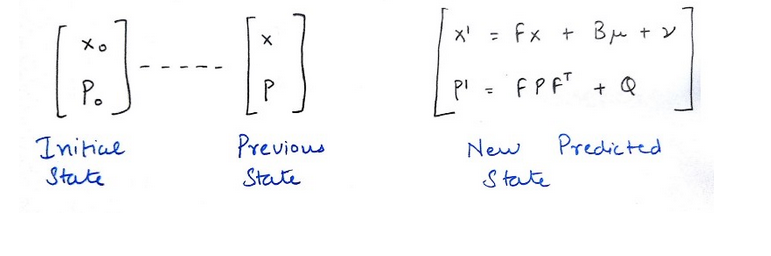

In [15]:

from IPython.display import Image
Image(filename='Desktop/3.png')


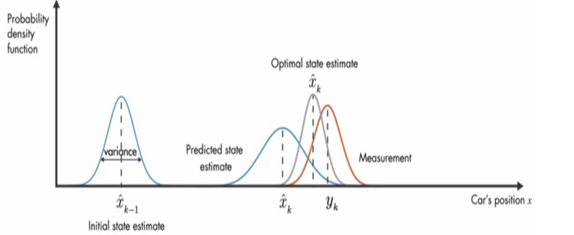

In [14]:

from IPython.display import Image
Image(filename='Desktop/1.png')


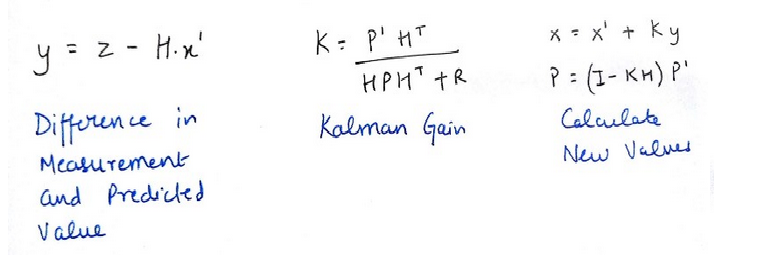

In [16]:

from IPython.display import Image
Image(filename='Desktop/2.png')


### Kalman filter to estimate the states of Inverted pendulum:


<ol>
State space equations of inverted pendulum are given below</ol>
\begin{align}
\dot{x} & = Ax+Bu\
\\{y} & = Cx\
\end{align}
<center>$\dot{x}= \begin{bmatrix}x \\\dot{ x}\\\theta\\\dot{\
\theta}\end{bmatrix}$</center>

<ol> When this Inverted pendulum on cart is observable. C matrix is made this A and C pair observable for these four states.</ol> 
<ol>Kalman filter is used to estimate the four states for sigle measurement y</ol>
<ol>Pendulum is placed in down position and moving in left and right direction as shown in the figure.</ol>





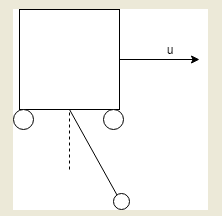

In [17]:

from IPython.display import Image
Image(filename='Desktop/5.png')

\begin{align}
\dot{x} & = Ax+Bu\
\\{y} & = Cx+Du\
\end{align}
<ol>Where input directly effects the measurements and is a zero matrix.</ol>



<ol> Kalman filter is demonstrated with the Matlab example</ol>
<ol> Augment the system with disturbance and noise. The block diagram of augmented system is as shown below</ol>


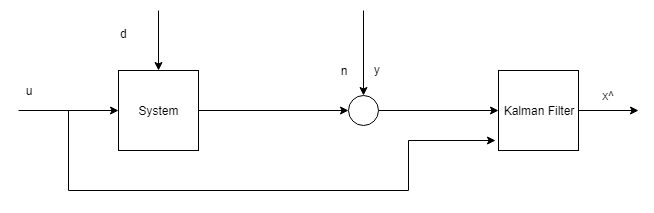

In [2]:
from IPython.display import Image
Image(filename='Desktop/4.png')

<ol> u is the input of the system</ol>
<ol> d is the disturbance added to the system</ol>
<ol> n is the noise added to the measurement</ol>
<ol> x^ is the estimate of the four states that is position and velocity of both cart and pendulum</ol>

<ol> Equations after the system is augmented with noise and disturbance</ol>
\begin{align}
\dot{x} & = Ax+Bu+V_d+0n\
\\{y} & = Cx+Du+0d+V_n\
\end{align}
<o> Kalman filter is built with linear quadratic estimator(lqe) in MATLAB</ol>

> In ctrlMsgUtils.warning (line 25)
  In DynamicSystem.checkLsimInputs (line 90)
  In DynamicSystem/lsim (line 67)
> In ctrlMsgUtils.warning (line 25)
  In DynamicSystem.checkLsimInputs (line 90)
  In DynamicSystem/lsim (line 67)
> In ctrlMsgUtils.warning (line 25)
  In DynamicSystem.checkLsimInputs (line 90)
  In DynamicSystem/lsim (line 67)



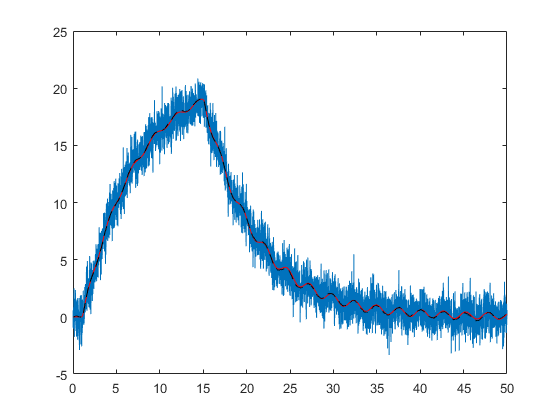

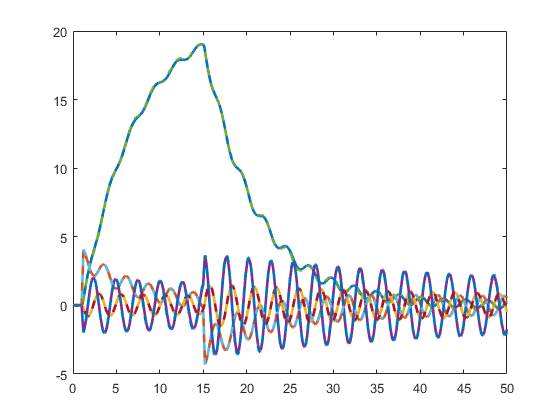

In [1]:
clear all, close all, clc

m = 1;
M = 5;
L = 2;
g = -10;
d = 1;

s = -1; % pendulum up (s=1)

% y = [x; dx; theta; dtheta];
A = [0 1 0 0;
    0 -d/M -m*g/M 0;
    0 0 0 1;
    0 -s*d/(M*L) -s*(m+M)*g/(M*L) 0];

B = [0; 1/M; 0; s*1/(M*L)];

C = [1 0 0 0];  

D = zeros(size(C,1),size(B,2));

%%  Augment system with disturbances and noise
Vd = .1*eye(4);  % disturbance covariance
Vn = 1;       % noise covariance

BF = [B Vd 0*B];  % augment inputs to include disturbance and noise

sysC = ss(A,BF,C,[0 0 0 0 0 Vn]);  % build big state space system... with single output

sysFullOutput = ss(A,BF,eye(4),zeros(4,size(BF,2)));  % system with full state output, disturbance, no noise

%%  Build Kalman filter
[Kf,P,E] = lqe(A,Vd,C,Vd,Vn);  % design Kalman filter
Kf = (lqr(A',C',Vd,Vn))';   % alternatively, possible to design using "LQR" code

sysKF = ss(A-Kf*C,[B Kf],eye(4),0*[B Kf]);  % Kalman filter estimator

%%  Estimate linearized system in "down" position (Gantry crane)
dt = .01;
t = dt:dt:50;

uDIST = randn(4,size(t,2));
uNOISE = randn(size(t));
u = 0*t;
u(100:120) = 100;     % impulse
u(1500:1520) = -100;  % impulse

uAUG = [u; Vd*Vd*uDIST; uNOISE];

[y,t] = lsim(sysC,uAUG,t);
[xtrue,t] = lsim(sysFullOutput,uAUG,t);


[x,t] = lsim(sysKF,[u; y'],t);

plot(t,xtrue,'-',t,x,'--','LineWidth',2)

figure
plot(t,y)
hold on
plot(t,xtrue(:,1),'r')
plot(t,x(:,1),'k--')

Kalman filter not only denoises the output y and also estimates the 4 state variables as shown in above graph 

<iframe width="853" height="480" src="https://www.youtube.com/embed/H4_hFazBGxU?list=PLMrJAkhIeNNR20Mz-VpzgfQs5zrYi085m" frameborder="0" allow="autoplay; encrypted-media" allowfullscreen></iframe>

 ## Linear Quadratic Guassian:
 
<ol>In control theory, the linear–quadratic–Gaussian (LQG) control problem is one of the most fundamental optimal control problems. It concerns linear systems driven by additive white Gaussian noise. The problem is to determine an output  feedback law that is optimal in the sense of minimizing the expected value of a quadratic cost criterion. Output measurements are assumed to be corrupted by Gaussian noise and the initial state, likewise, is assumed to be a Gaussian random vector.</ol>
<ol> the LQG controller, is unique and it is simply a combination of a Kalman filter, i.e. a linear–quadratic state estimator (LQE), together with a linear–quadratic regulator (LQR).</ol>.
<ol>  The separation principle states that the state estimator and the state feedback can be designed independently. LQG control applies to both linear time-invariant systems as well as linear time-varying systems, and constitutes a linear dynamic feedback control law that is easily computed and implemented.</ol>.
<ol> Block diagram of LQG is as shown
</ol>


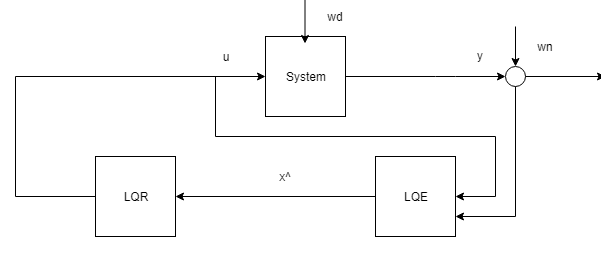

In [42]:
from IPython.display import Image
Image(filename='Desktop/6.png')


<o> Linear system which are both controllable and observable.We can develop optimal feedback control through LQR and also develop an optimal kalman gain using matrices A and C. LQR is choosen to place the eigen values of closed loop system.LQE is used to place the eigen values of estimated dynamics. </ol>

<o>state estimation error is given by </ol>

\begin{align}
\\{ξ} & = x-\hat x\quad\quad \text{-----1}
\\\
\end{align}



\begin{align}
\\\dot{x} & = Ax+Bu+V_d\quad\quad \text{-----2}\
\\{u} & = -k *\hat x\quad\quad \text{-----3}\
\end{align}


<o>Substitute equation 3 in 2 we will get </ol>
\begin{align}
\\\dot{x} & = Ax-Bkx+V_d\quad\quad \text{-----4}\
\\\hat x & = x-(x-\hat x)\quad\quad \text{-----5}\
\end{align}

<o>Substitute equation 5 in 4 we will get </ol>
\begin{align}
\\\dot{x} & = Ax-Bkx+bk(x-\hat x)+V_d\quad\quad \text{-----6}\
\
\end{align}

<o>Substitute equation 3 in 2 we will get </ol>
\begin{align}
\\\dot{ξ} & = (A-K_fC)*ξ+V_d-K_fV_n\quad\quad \text{-----7}\
\
\end{align}

<o>combine equation 6 and 7 we will get </ol>


<center>$\frac{\text{d}}{\text{d}t}\begin{bmatrix}x \\ \epsilon \end{bmatrix} = \begin{bmatrix}A -BK & BK\\0 & A-K_fC \end{bmatrix}\begin{bmatrix}x \\ \epsilon \end{bmatrix}+\begin{bmatrix}I & 0 \\I & -K_f \end{bmatrix}\begin{bmatrix}V_d \\ V_n \end{bmatrix}$<center>

<o>We will get two eigen values.States are stabalized by LQR Control. Estimated value is controlled by LQE eigen value.
We can design both LQR and LQE separately and when we combine them properties of each system is retained</ol>